# Histogram Fit

Fitting histograms is sligthly different than fitting a data sample.
The likelihood is in this case calculated from the events in the bin and the expected number from the model.
Care is needed when dealing with empty bins, which can modify significantly the result.
Binned data distributions allow also to use the $\chi^2$ as a loss function

## Generate the Data

Let's create a model of a $\Delta m = m(D^0\pi^+) - m(D^0)$ distribution, which is typical of Charm physics.

$$
\begin{align}
  \mathcal{P}_{\text{sig}} =& f_{\text{JSU}} J_{S_U}(m;\mu+\delta_{\text{JSU}},\sigma*r_{\text{JSU}}, \nu, \tau) + (1-f_{\text{JSU}}) G_i(m)%\nonumber\\
    %&(1-f_{\text{JSU}}) \left( f_{G_1} G_1(\mDzpif; \mu, \sigma) + (1-f_{G_1}) G_2(\mDzpif; \mu+\delta_{G_2}, \sigma*r_{G_2}), \right)
\end{align}
$$
where $J_{S_U}(x;\mu,\sigma, \nu, \tau)$ is defined as
$$
\begin{align}
f(y|\mu,\sigma,\nu,\tau)=\frac{e^{-\frac{1}{2}r^2}}{2\pi c\cdot\sigma \cdot\tau\sqrt{z^2+1}}
\end{align}
$$
with
$$
\begin{align*}
r &=-\nu+\frac{\text{asinh}(z)}{\tau}\\
z &= \frac{y-(\mu+c\cdot\sigma\cdot\sqrt{w} \sinh(\omega))}{c \cdot\sigma}\\
c &=\frac{w-1}{2\sqrt{w\cosh(2\omega)+1)}}\\
w &=e^{\tau^2}\\
\omega &= -\nu\tau
\end{align*}
$$
and $G_i(m)$ is
$$
\begin{align}
  G_1(m) &= G_a(m; \mu, \sigma)\\
  G_2(m) &= f_{G_a} G_a(m; \mu, \sigma) + (1-f_{G_a}) G_b(m; \mu+\delta_{G_b}, \sigma*r_{G_b})\\
  G_3(m) &= f_{G_a} G_a(m; \mu, \sigma) + \nonumber\\
   &\phantom{= } (1-f_{G_a}) \left[ f_{G_b}G_b(m; \mu+\delta_{G_b}, \sigma*r_{G_b}) +\right.\nonumber\\
   &\phantom{= (1-f_{G_a}) [ }\left.(1-f_{G_b}) G_c(m; \mu+\delta_{G_c}, \sigma*r_{G_c}) \right]
\end{align}
$$

In [9]:
# Load libraries
import mplhep
import numpy as np

import zfit
from zfit import z

mplhep.style.use("LHCb2")
import matplotlib.pyplot as plt

In [2]:
import os, sys
sys.path.append(f'{os.environ["PWD"]}/utilities')
from pdfs import JohnsonSU

In [3]:
# Model
# create space
obs = zfit.Space("x", limits=(2004.4, 2019.4))

# parameters
mu = zfit.Parameter("mu", 2010.3, 2008, 2012)
sigma = zfit.Parameter("sigma", 0.23811, 0.01, 10)
nu = zfit.Parameter("nu", 0.011797, -1, 1)
tau = zfit.Parameter("tau", 0.76992, 0, 2)

dm = zfit.Parameter("dm", -0.00292938, -2, 2)
rs = zfit.Parameter("rs", 1.0146, 0, 10)

# model building, pdf creation
gauss = zfit.pdf.Gauss(mu=mu+dm, sigma=rs*sigma, obs=obs)
jsu = JohnsonSU(mean=mu, sigma=sigma, nu=nu, tau=tau, obs=obs)
#exponential = zfit.pdf.Exponential(lambd, obs=obs)
#model = zfit.pdf.SumPDF([gauss, exponential], fracs=frac)

In [10]:
x = np.linspace(2004.4, 2019.4, 1000)
plt.plot(x,jsu.pdf(x).numpy())

UnboundLocalError: cannot access local variable 'z' where it is not associated with a value

### Typical fit results

x =  2011.9 C L(2004.4 - 2019.4) B(600) // [MeV/c^{2}]

m =  2010.3 +/- 0.0068063 C L(2008 - 2012) // [MeV/c^{2}]

s =  0.23811 +/- 0.010601 C L(0.01 - 10) // [MeV/c^{2}]

nu =  0.011797 +/- 0.010275 C L(-1 - 1) 

tau =  0.76992 +/- 0.030061 C L(0 - 2) 

dm = -0.00292938 +/- 0.012157 C L(-2 - 2) // [MeV/c^{2}]

rs =  1.0146 +/- 0.061642 C L(0 - 10) 

fJsu =  0.62013 +/- 0.016832 C L(0 - 1) 

nsig =  3005492 +/- 2000.0 L(1e+06 - 1e+07) 

th =  2004.4 C L(-INF - +INF) 

a =  0.65476 +/- 0.018310 C L(0 - 1.5) 

b =  0.060760 +/- 0.0040013 C L(0 - 1) 

nbkg =  1435465 +/- 2000.0 L(1e+06 - 1e+07) 

nsig_D0 =  269996 +/-  (-555.17, 555.52) L(3863.09 - 1.27482e+06) 

nsig_D0b =  276608 +/-  (-561.60, 561.63) L(3863.09 - 1.27482e+06) 

nbkg_D0 =  131860 +/-  (-412.32, 412.96) L(1931.55 - 1.27482e+06) 

nbkg_D0b =  133465 +/-  (-414.89, 415.22) L(1931.55 - 1.27482e+06) 

AT_sig =  0.049354 +/-  (-0.0020518, 0.0020506) L(-1 - 1) 

ATb_sig = -0.0642295 +/-  (-0.0020243, 0.0020259) L(-1 - 1) 

AT_bkg = -0.00359516 +/-  (-0.0031305, 0.0031281) L(-1 - 1) 

ATb_bkg = -0.00294564 +/-  (-0.0031115, 0.0031081) L(-1 - 1) 

Acp_sig = 0.0567916 +/- 0.00144121

Ap_sig = -0.00743792 +/- 0.00144121

Acp_bkg = -0.000324762 +/- 0.00220586

Ap_bkg = -0.0032704 +/- 0.00220586


In [12]:
def JohnsonSUTest(x, mean, sigma, nu, tau):
    omega = -nu * tau
    w = np.exp( tau * tau )
    c = 0.5 * ( w - 1 ) / np.sqrt( w * np.cosh( 2*w ) + 1 )
    y = ( x - (mean + c * sigma * np.sqrt(w) * np.sinh(omega)) ) / c / sigma 
    r = - nu + np.arcsinh( y ) / tau
    return np.exp( 0.5 * np.exp( -0.5 * r * r) / ( np.pi * c * sigma * tau * np.sqrt( y*y + 1 ) ) )
X = np.linspace(2004.4, 2019.4, 1000)
Y = JohnsonSUTest(X, 2010.3, 0.23811, 0.011797, 0.76992)

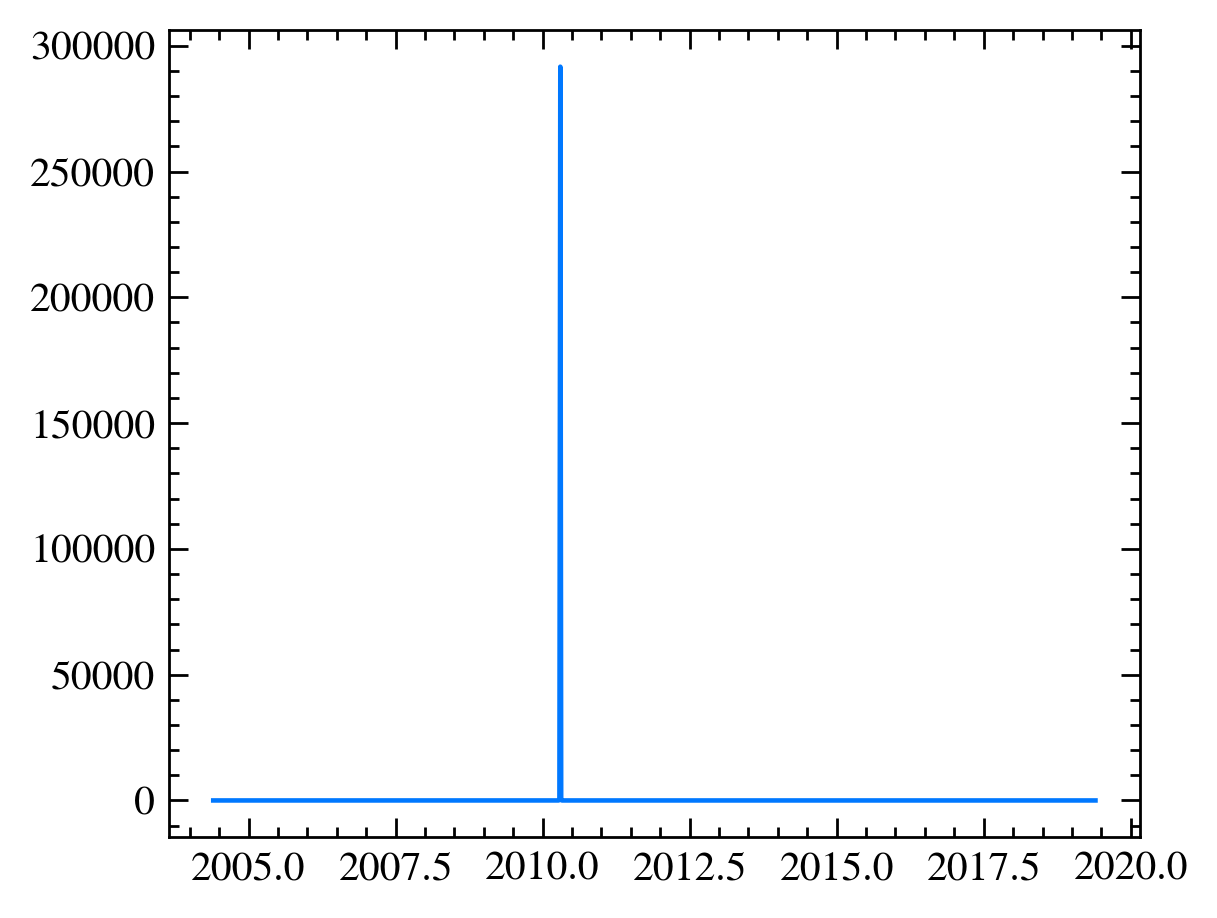

In [13]:
plt.plot(X,Y)